# Regression

## Age Fossil Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('D:/Visual Studio/Dataset Tugas MBC/Week 4/Regression/Age _Fossil.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4398 entries, 0 to 4397
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   uranium_lead_ratio          4398 non-null   float64
 1   carbon_14_ratio             4398 non-null   float64
 2   radioactive_decay_series    4398 non-null   float64
 3   stratigraphic_layer_depth   4398 non-null   float64
 4   geological_period           4398 non-null   object 
 5   paleomagnetic_data          4398 non-null   object 
 6   inclusion_of_other_fossils  4398 non-null   bool   
 7   isotopic_composition        4398 non-null   float64
 8   surrounding_rock_type       4398 non-null   object 
 9   stratigraphic_position      4398 non-null   object 
 10  fossil_size                 4398 non-null   float64
 11  fossil_weight               4398 non-null   float64
 12  age                         4398 non-null   int64  
dtypes: bool(1), float64(7), int64(1),

In [3]:
df.head()

,uranium_lead_ratio,carbon_14_ratio,radioactive_decay_series,stratigraphic_layer_depth,geological_period,paleomagnetic_data,inclusion_of_other_fossils,isotopic_composition,surrounding_rock_type,stratigraphic_position,fossil_size,fossil_weight,age
0,0.738061,0.487707,0.907884,91.17,Cretaceous,Normal polarity,False,0.915951,Conglomerate,Middle,50.65,432.00,43523
1,0.560096,0.341738,1.121302,165.44,Cambrian,Normal polarity,False,0.803968,Limestone,Top,48.85,353.29,44112
2,0.424773,0.218493,0.103855,218.98,Cambrian,Normal polarity,True,0.792441,Shale,Bottom,37.66,371.33,43480
3,0.349958,0.704649,0.383617,51.09,Permian,Normal polarity,True,0.074636,Limestone,Bottom,39.10,232.84,30228
4,0.886811,0.777494,0.593254,313.72,Devonian,Normal polarity,True,1.646640,Shale,Top,90.84,277.67,67217


In [4]:
df.duplicated().sum(), df.isna().sum()

(0,
 uranium_lead_ratio            0
 carbon_14_ratio               0
 radioactive_decay_series      0
 stratigraphic_layer_depth     0
 geological_period             0
 paleomagnetic_data            0
 inclusion_of_other_fossils    0
 isotopic_composition          0
 surrounding_rock_type         0
 stratigraphic_position        0
 fossil_size                   0
 fossil_weight                 0
 age                           0
 dtype: int64)

In [5]:
num_cols = [var for var in df.columns if df[var].dtype != 'O']
num_cols

['uranium_lead_ratio',
 'carbon_14_ratio',
 'radioactive_decay_series',
 'stratigraphic_layer_depth',
 'inclusion_of_other_fossils',
 'isotopic_composition',
 'fossil_size',
 'fossil_weight',
 'age']

In [6]:
cat_cols = [var for var in df.columns if df[var].dtype == 'O']
cat_cols

['geological_period',
 'paleomagnetic_data',
 'surrounding_rock_type',
 'stratigraphic_position']

In [7]:
cols = ['geological_period', 'paleomagnetic_data', 'surrounding_rock_type', 'stratigraphic_position']

for cols in cat_cols:
    print(f'Kolom: {cols}')
    print(f'Value Count: {df[cols].value_counts()}')
    print('-'*50)

Kolom: geological_period
Value Count: geological_period
Cambrian         882
Triassic         676
Cretaceous       601
Devonian         498
Jurassic         490
Paleogene        405
Permian          365
Neogene          311
Ordovician       100
Carboniferous     52
Silurian          18
Name: count, dtype: int64
--------------------------------------------------
Kolom: paleomagnetic_data
Value Count: paleomagnetic_data
Normal polarity      3160
Reversed polarity    1238
Name: count, dtype: int64
--------------------------------------------------
Kolom: surrounding_rock_type
Value Count: surrounding_rock_type
Sandstone       1497
Limestone       1166
Shale           1144
Conglomerate     591
Name: count, dtype: int64
--------------------------------------------------
Kolom: stratigraphic_position
Value Count: stratigraphic_position
Bottom    2667
Middle    1267
Top        464
Name: count, dtype: int64
--------------------------------------------------


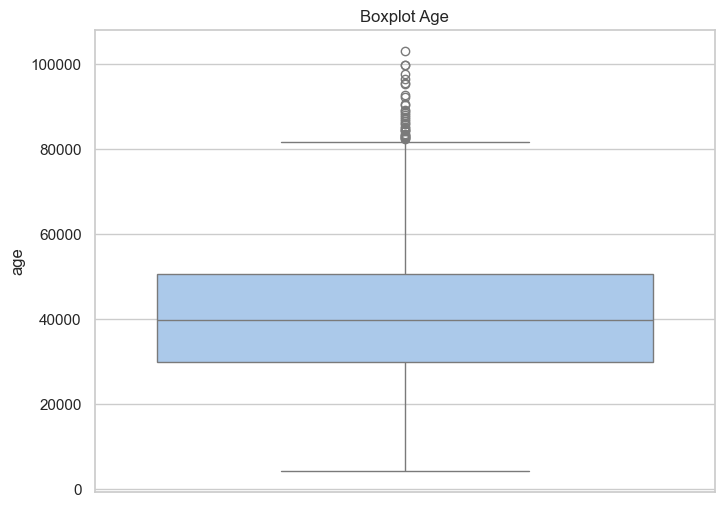

In [8]:
sns.set(style="whitegrid", palette="pastel")

# Boxplot untuk Glucose by Outcome
plt.figure(figsize=(8, 6))
plt.title('Boxplot Age')
sns.boxplot(y='age', data=df)
plt.show()

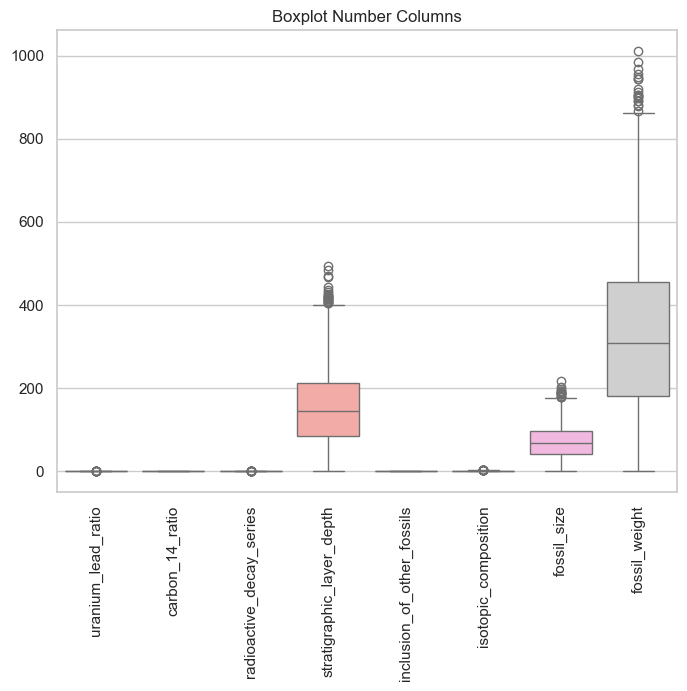

In [9]:
plt.figure(figsize=(8, 6))
plt.title('Boxplot Number Columns')
sns.boxplot(data=df[num_cols].iloc[:,:-1])
plt.xticks(rotation=90)
plt.show()

In [10]:
corr = df[num_cols].corr()
corr

,uranium_lead_ratio,carbon_14_ratio,radioactive_decay_series,stratigraphic_layer_depth,inclusion_of_other_fossils,isotopic_composition,fossil_size,fossil_weight,age
uranium_lead_ratio,1.000000,0.011568,0.013619,-0.013067,-0.013533,-0.004197,-0.033812,0.003809,0.882940
carbon_14_ratio,0.011568,1.000000,-0.003103,0.015964,0.002113,-0.002213,-0.018974,-0.003823,0.134673
radioactive_decay_series,0.013619,-0.003103,1.000000,-0.001629,-0.014111,0.010149,0.011459,-0.008560,0.104299
stratigraphic_layer_depth,-0.013067,0.015964,-0.001629,1.000000,0.021268,0.022181,0.003608,-0.009101,0.333789
inclusion_of_other_fossils,-0.013533,0.002113,-0.014111,0.021268,1.000000,0.015378,-0.020104,0.003598,-0.007635
isotopic_composition,-0.004197,-0.002213,0.010149,0.022181,0.015378,1.000000,-0.018277,-0.032428,0.005208
fossil_size,-0.033812,-0.018974,0.011459,0.003608,-0.020104,-0.018277,1.000000,0.021579,-0.031451
fossil_weight,0.003809,-0.003823,-0.008560,-0.009101,0.003598,-0.032428,0.021579,1.000000,0.002577
age,0.882940,0.134673,0.104299,0.333789,-0.007635,0.005208,-0.031451,0.002577,1.000000


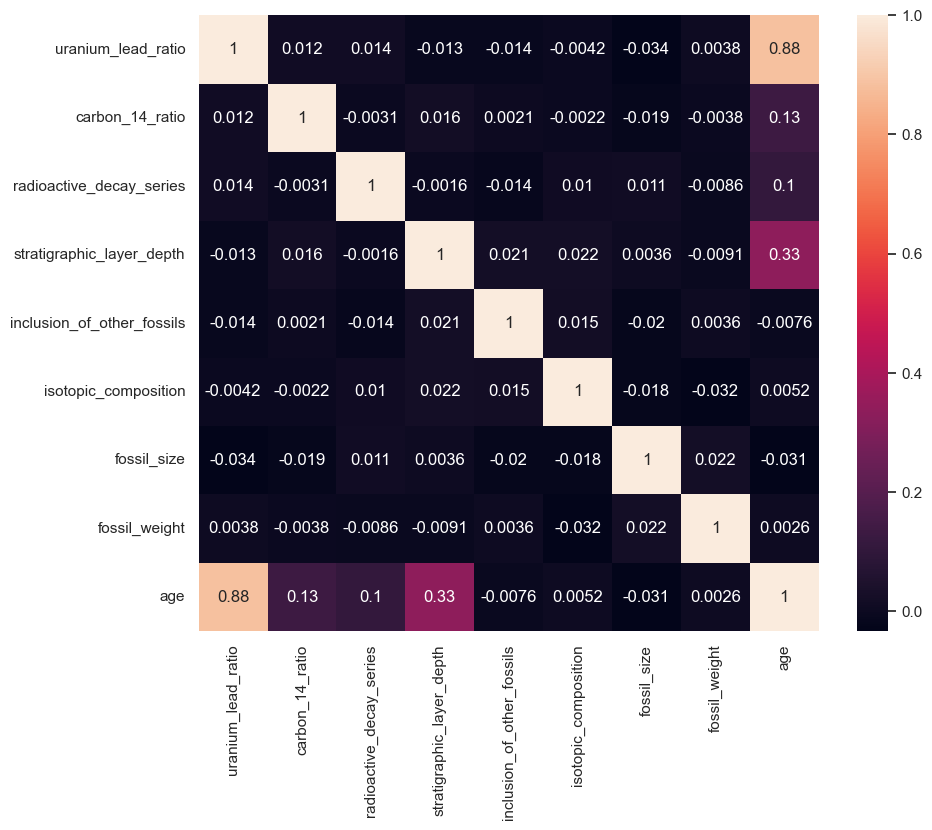

In [11]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True)
plt.show()

<Axes: xlabel='uranium_lead_ratio', ylabel='age'>

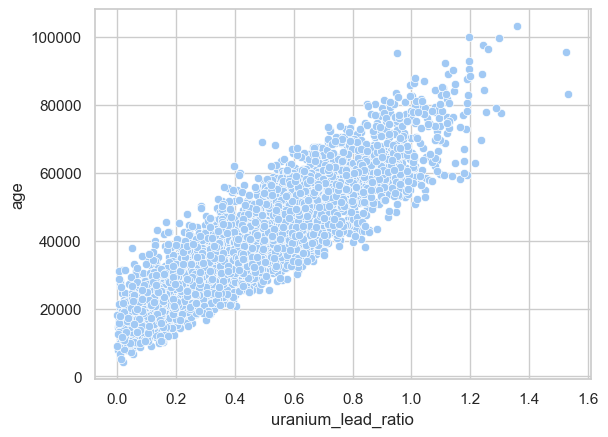

In [12]:
sns.scatterplot(x='uranium_lead_ratio', y='age', data=df)

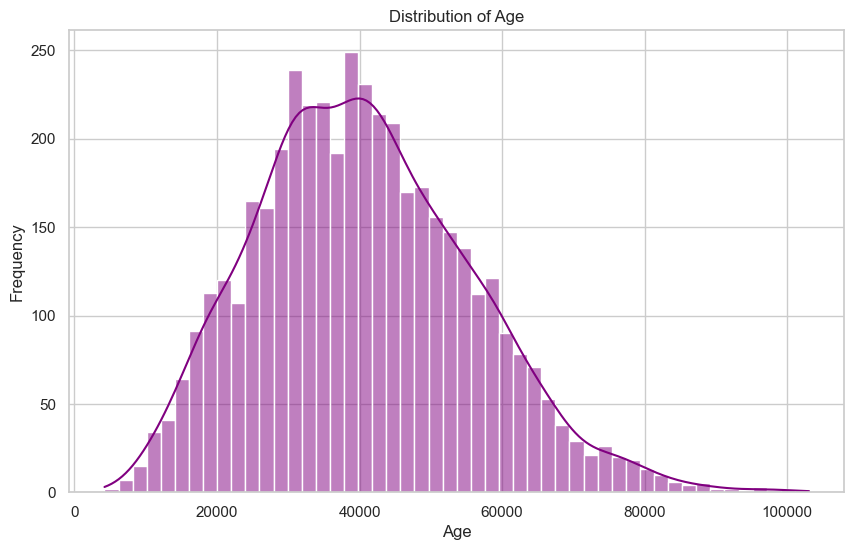

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=50, kde=True, color='purple')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [14]:
IQR = df['age'].quantile(0.75) - df['age'].quantile(0.25)
IQR

20784.25

In [15]:
Higher_outlier = df['age'].quantile(0.75) + (IQR * 1.5)
lower_outlier = df['age'].quantile(0.25) - (IQR * 1.5)
print(Higher_outlier)
print(lower_outlier)

81726.875
-1410.125


In [16]:
for x in df.index:
    if df.loc[x, 'age'] > Higher_outlier:
        df.drop(x, inplace=True)

In [17]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

cols =  ['stratigraphic_position', 'paleomagnetic_data', 'surrounding_rock_type', 'geological_period']

for col in cols:
  df[col] = label_encoder.fit_transform(df[col])

df.head()

,uranium_lead_ratio,carbon_14_ratio,radioactive_decay_series,stratigraphic_layer_depth,geological_period,paleomagnetic_data,inclusion_of_other_fossils,isotopic_composition,surrounding_rock_type,stratigraphic_position,fossil_size,fossil_weight,age
0,0.738061,0.487707,0.907884,91.17,2,0,False,0.915951,0,1,50.65,432.00,43523
1,0.560096,0.341738,1.121302,165.44,0,0,False,0.803968,1,2,48.85,353.29,44112
2,0.424773,0.218493,0.103855,218.98,0,0,True,0.792441,3,0,37.66,371.33,43480
3,0.349958,0.704649,0.383617,51.09,8,0,True,0.074636,1,0,39.10,232.84,30228
4,0.886811,0.777494,0.593254,313.72,3,0,True,1.646640,3,2,90.84,277.67,67217


In [18]:
for cols in cat_cols:
    print(f'Kolom: {cols}')
    print(f'Value Count: {df[cols].value_counts()}')
    print('-'*50)

Kolom: geological_period
Value Count: geological_period
0     871
10    675
2     599
3     490
4     490
7     403
8     360
5     309
6      99
1      52
9      17
Name: count, dtype: int64
--------------------------------------------------
Kolom: paleomagnetic_data
Value Count: paleomagnetic_data
0    3139
1    1226
Name: count, dtype: int64
--------------------------------------------------
Kolom: surrounding_rock_type
Value Count: surrounding_rock_type
2    1486
1    1158
3    1132
0     589
Name: count, dtype: int64
--------------------------------------------------
Kolom: stratigraphic_position
Value Count: stratigraphic_position
0    2635
1    1267
2     463
Name: count, dtype: int64
--------------------------------------------------


In [27]:
cols = ['uranium_lead_ratio', 'carbon_14_ratio', 'radioactive_decay_series', 'stratigraphic_layer_depth', 'inclusion_of_other_fossils', 'isotopic_composition', 'fossil_size', 'age']
for cols in num_cols:
    print(f'Kolom: {cols}')
    print(f'Max Value: {df[cols].max()}')
    print(f'Min Value: {df[cols].min()}')
    print('-'*50)

Kolom: uranium_lead_ratio
Max Value: 1.3042014024444415
Min Value: 0.0002411924259144
--------------------------------------------------
Kolom: carbon_14_ratio
Max Value: 0.9999999999
Min Value: 0.0002438505437448
--------------------------------------------------
Kolom: radioactive_decay_series
Max Value: 1.5133254443214954
Min Value: 7.56371812158374e-05
--------------------------------------------------
Kolom: stratigraphic_layer_depth
Max Value: 494.2
Min Value: 0.13
--------------------------------------------------
Kolom: inclusion_of_other_fossils
Max Value: 1
Min Value: 0
--------------------------------------------------
Kolom: isotopic_composition
Max Value: 3.0714338323637533
Min Value: 0.0002749630652936
--------------------------------------------------
Kolom: fossil_size
Max Value: 216.39
Min Value: 0.13
--------------------------------------------------
Kolom: fossil_weight
Max Value: 1010.09
Min Value: 0.62
--------------------------------------------------
Kolom: age
M

In [19]:
df['inclusion_of_other_fossils'] = df['inclusion_of_other_fossils'].astype('int64')

In [20]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

x = df.drop(['age'], axis=1)
y = df['age']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

x_train.shape, x_test.shape

((3273, 12), (1092, 12))

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor


model_rf = RandomForestRegressor(random_state=0)
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
grid_search_rf = GridSearchCV(model_rf, param_grid_rf, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_rf.fit(x_train, y_train)

best_rf = grid_search_rf.best_estimator_
y_pred_rf = best_rf.predict(x_test)

print(f'Root Mean Squared Error Random Forest: {root_mean_squared_error(y_test, y_pred_rf)}')
print(f'Mean Squared Error Random Forest: {mean_squared_error(y_test, y_pred_rf)}')
print(f'Mean Absolute Error Random Forest: {mean_absolute_error(y_test, y_pred_rf)}')
print(f'R2 Score Random Forest: {r2_score(y_test, y_pred_rf)}')

Root Mean Squared Error Random Forest: 2468.203138621171
Mean Squared Error Random Forest: 6092026.733499399
Mean Absolute Error Random Forest: 1941.2182203907205
R2 Score Random Forest: 0.9716039284000296


In [22]:
from xgboost import XGBRegressor

model_xgb = XGBRegressor(random_state=0)
param_grid_xgb = {
    'eta': [0.01, 0.1, 0.3],
    'max_depth': [3, 6, 9],
    'n_estimators': [100, 200, 300]
}
grid_search_xgb = GridSearchCV(model_xgb, param_grid_xgb, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_xgb.fit(x_train, y_train)

best_xgb = grid_search_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(x_test)

print(f'Root Mean Squared Error XGBoost: {root_mean_squared_error(y_test, y_pred_xgb)}')
print(f'Mean Squared Error XGBoost: {mean_squared_error(y_test, y_pred_xgb)}')
print(f'Mean Absolute Error XGBoost: {mean_absolute_error(y_test, y_pred_xgb)}')
print(f'R2 Score XGBoost: {r2_score(y_test, y_pred_xgb)}')

Root Mean Squared Error XGBoost: 1423.5369856205386
Mean Squared Error XGBoost: 2026457.5494296097
Mean Absolute Error XGBoost: 1130.5416890238669
R2 Score XGBoost: 0.9905543038162524


In [28]:
import pickle

with open('modelreg.pkl', 'wb') as f:
    pickle.dump(grid_search_xgb, f)
